In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
ls


drive/  sample_data/


In [3]:
%cd drive/MyDrive/Emotion_recognition/

/content/drive/MyDrive/Emotion_recognition


In [4]:
ls

fer2013/  fer2013.tar.gz


In [5]:
import tarfile


fname = 'fer2013.tar.gz'
if fname.endswith("tar.gz"):
    tar = tarfile.open(fname, "r:gz")
    tar.extractall()
    tar.close()
elif fname.endswith("tar"):
    tar = tarfile.open(fname, "r:")
    tar.extractall()
    tar.close()

In [6]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


In [7]:
df = pd.read_csv('fer2013/fer2013.csv')

In [8]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [9]:
df['emotion'].unique()

array([0, 2, 4, 6, 3, 5, 1])

In [10]:
label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}

In [11]:
x = np.array(df['pixels'][0].split()).reshape(48,48)

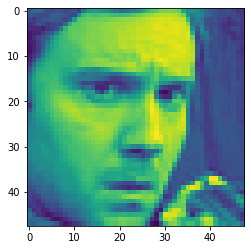

In [12]:
plt.imshow(x.astype(float))

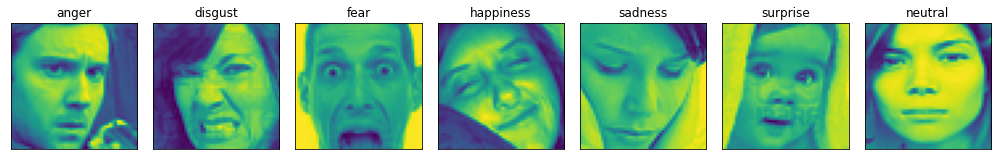

In [13]:
fig = plt.figure(1, (14, 14))
k = 0
for label in sorted(df.emotion.unique()):
    for j in range(1):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')
        k += 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(label_to_text[label])
        plt.tight_layout()

In [43]:
img_array = df['pixels'].apply(lambda x : np.array(x.split(' ')).reshape(48, 48,1).astype('float32'))

In [44]:
img_array = np.stack(img_array,axis=0)

In [45]:
img_array.shape

(35887, 48, 48, 1)

In [46]:
labels = df['emotion'].values
labels

array([0, 0, 2, ..., 0, 3, 2])

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,y_train,y_test = train_test_split(img_array,labels,test_size = 0.2)

In [49]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((28709, 48, 48, 1), (28709,), (7178, 48, 48, 1), (7178,))

In [50]:
X_train = X_train/255
X_test = X_test/255

In [51]:
basemodel = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape = (48,48,1))])

In [52]:

basemodel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 46, 46, 32)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [53]:
basemodel = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #
                                        tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #
                                        tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #
                                        tf.keras.layers.Conv2D(256,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(1000,activation='relu'),
                                        tf.keras.layers.Dense(7,activation = 'softmax')                          
                                        ])

In [54]:
basemodel.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 2, 2, 256)        

In [57]:
basemodel.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [59]:
basemodel.fit(X_train,y_train,epochs=50,validation_split=0.2,callbacks=None)

Epoch 1/50
718/718 [==============================] - 4s 6ms/step - loss: 0.3318 - accuracy: 0.8780 - val_loss: 1.3606 - val_accuracy: 0.6912
Epoch 2/50
718/718 [==============================] - 4s 5ms/step - loss: 0.2883 - accuracy: 0.8955 - val_loss: 1.4332 - val_accuracy: 0.6820
Epoch 3/50
718/718 [==============================] - 4s 5ms/step - loss: 0.2652 - accuracy: 0.9047 - val_loss: 1.6078 - val_accuracy: 0.6691
Epoch 4/50
718/718 [==============================] - 4s 6ms/step - loss: 0.2362 - accuracy: 0.9161 - val_loss: 1.6790 - val_accuracy: 0.6715
Epoch 5/50
718/718 [==============================] - 4s 5ms/step - loss: 0.2198 - accuracy: 0.9228 - val_loss: 1.7445 - val_accuracy: 0.6639
Epoch 6/50
718/718 [==============================] - 4s 5ms/step - loss: 0.1992 - accuracy: 0.9287 - val_loss: 1.8338 - val_accuracy: 0.6553
Epoch 7/50
718/718 [==============================] - 4s 5ms/step - loss: 0.1865 - accuracy: 0.9342 - val_loss: 1.9711 - val_accuracy: 0.6454
Epoch 

In [61]:
from IPython.display import clear_output

the actual label is anger
predicted label is anger


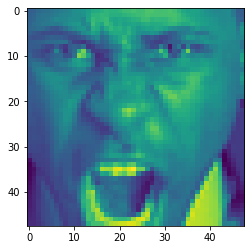

In [64]:
for k in range(40):
  print(f'the actual label is {label_to_text[y_test[k]]}')
  predicted_class = basemodel.predict(tf.expand_dims(X_test[k],0)).argmax()
  print(f'predicted label is {label_to_text[predicted_class]}')
  plt.imshow(X_test[k].reshape(48,48))
  plt.show()
  time.sleep(3)
  clear_output(wait=True)

In [63]:
import time